In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Working with Text Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll be looking at and exploring European restaurant reviews. The dataset is rather tiny, but that's just because it has to run on any machine. In real life, just like with images, texts can be several terabytes long.

The dataset is located [here](https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews) and as always, it's been provided to you in the `data/` folder.

### Problem 1. Read the dataset (1 point)
Read the dataset, get acquainted with it. Ensure the data is valid before you proceed.

How many observations are there? Which country is the most represented? What time range does the dataset represent?

Is the sample balanced in terms of restaurants, i.e., do you have an equal number of reviews for each one? Most importantly, is the dataset balanced in terms of **sentiment**?

=== DATASET OVERVIEW ===
Dataset shape: (1502, 6)
Number of observations: 1502
Number of features: 6


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1502 non-null   object
 1   Restaurant Name  1502 non-null   object
 2   Sentiment        1502 non-null   object
 3   Review Title     1502 non-null   object
 4   Review Date      1502 non-null   object
 5   Review           1502 non-null   object
dtypes: object(6)
memory usage: 70.5+ KB
None


=== FIRST 5 ROWS ===
  Country            Restaurant Name Sentiment  \
0  France  The Frog at Bercy Village  Negative   
1  France  The Frog at Bercy Village  Negative   
2  France  The Frog at Bercy Village  Negative   
3  France  The Frog at Bercy Village  Negative   
4  France  The Frog at Bercy Village  Negative   

                                Review T

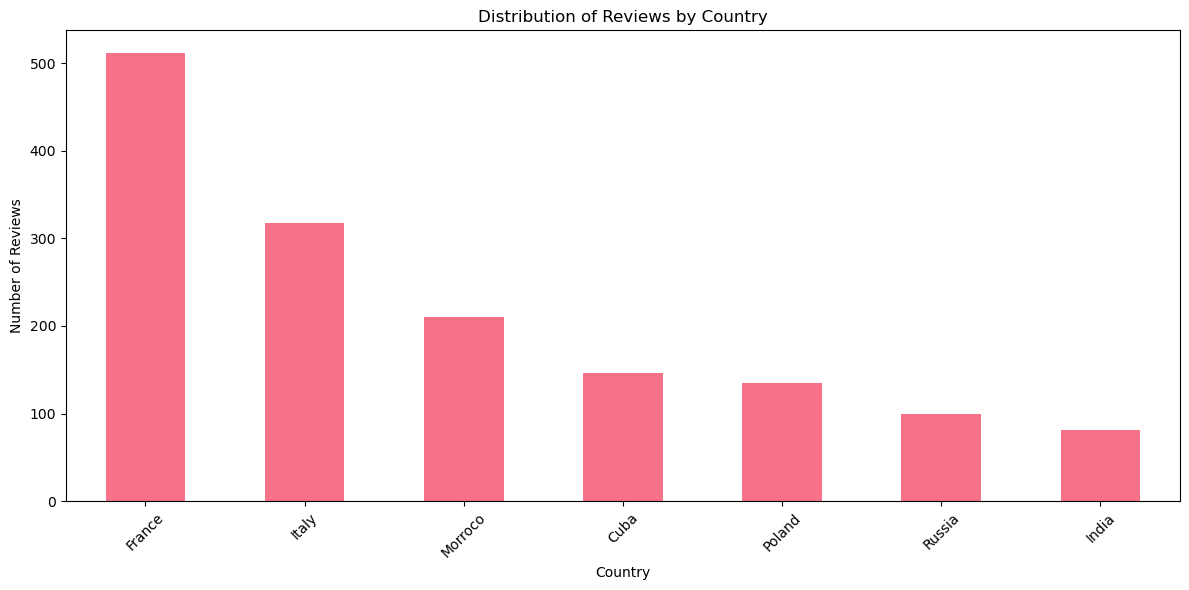



=== TIME RANGE ANALYSIS ===

Analyzing Review Date:
Sample values: ['May 2024 •', 'Feb 2024 •', 'Nov 2023 •', 'Mar 2023 •', 'Nov 2022 •']
Unique values count: 143
Date range: 2010-09-01 00:00:00 to 2024-07-01 00:00:00
Time span: 5052 days (13.8 years)
Years covered: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Number of different months: 139


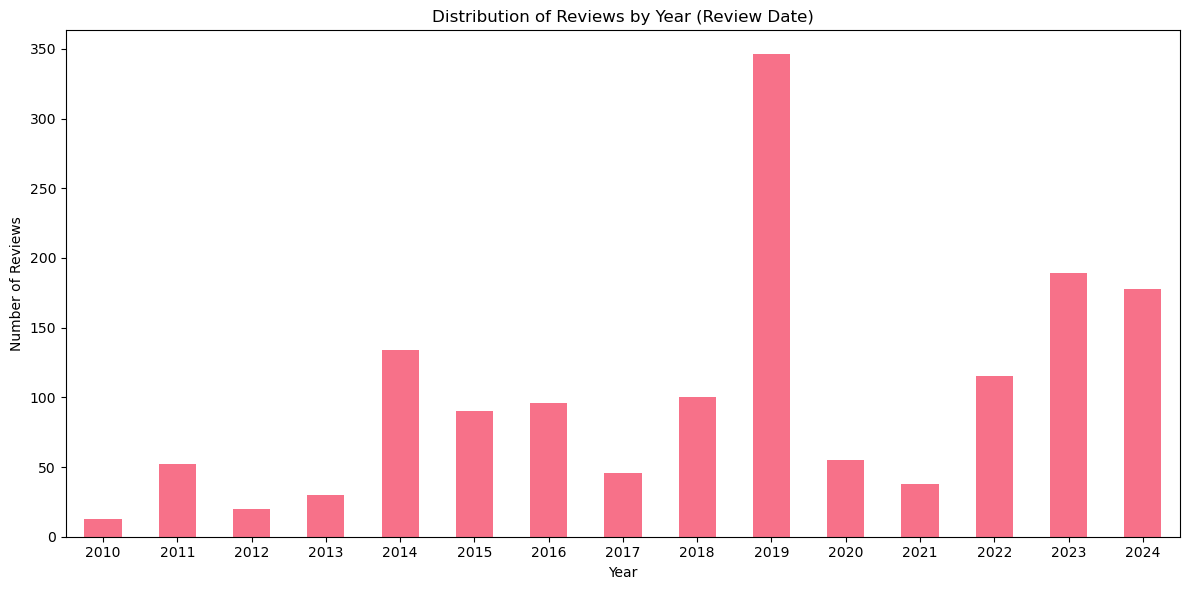

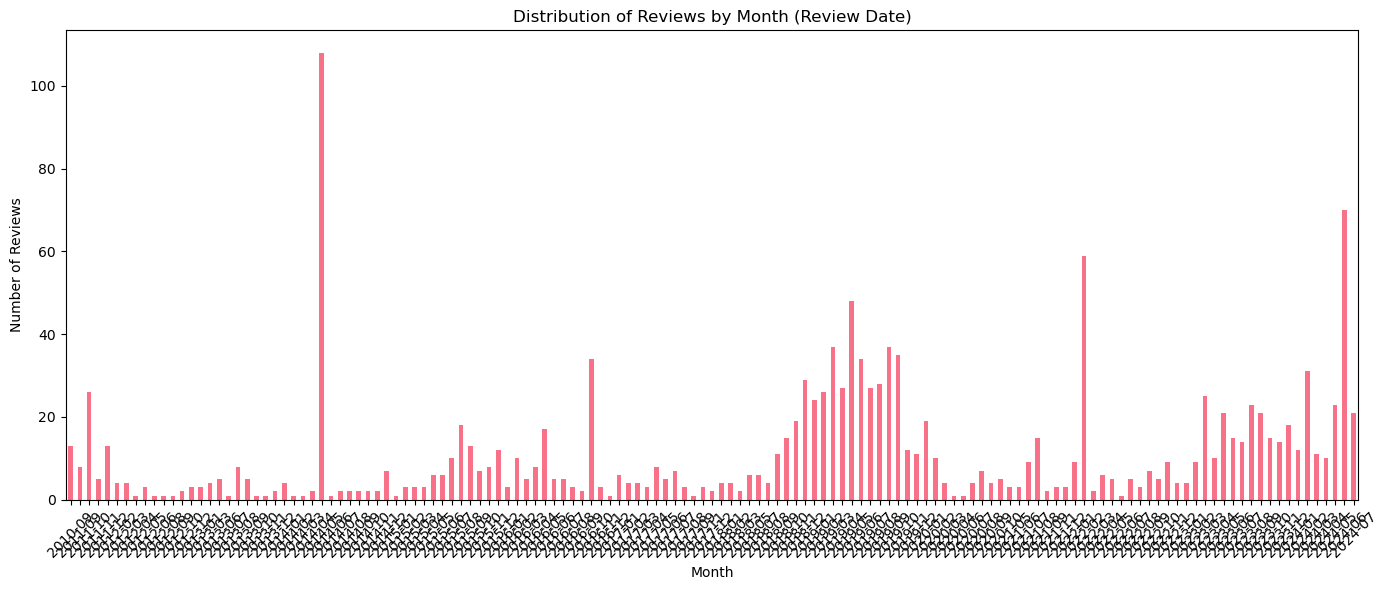



=== RESTAURANT BALANCE ANALYSIS ===

Analyzing Restaurant Name:
Number of unique restaurants: 7
Average reviews per restaurant: 214.57
Median reviews per restaurant: 146.00
Min reviews per restaurant: 81
Max reviews per restaurant: 512

Top 10 restaurants by number of reviews:
Restaurant Name
The Frog at Bercy Village                512
Ad Hoc Ristorante (Piazza del Popolo)    318
The LOFT                                 210
Old Square (Plaza Vieja)                 146
Stara Kamienica                          135
Pelmenya                                 100
Mosaic                                    81
Name: count, dtype: int64

Coefficient of variation: 0.715
⚠ Dataset is imbalanced across restaurants


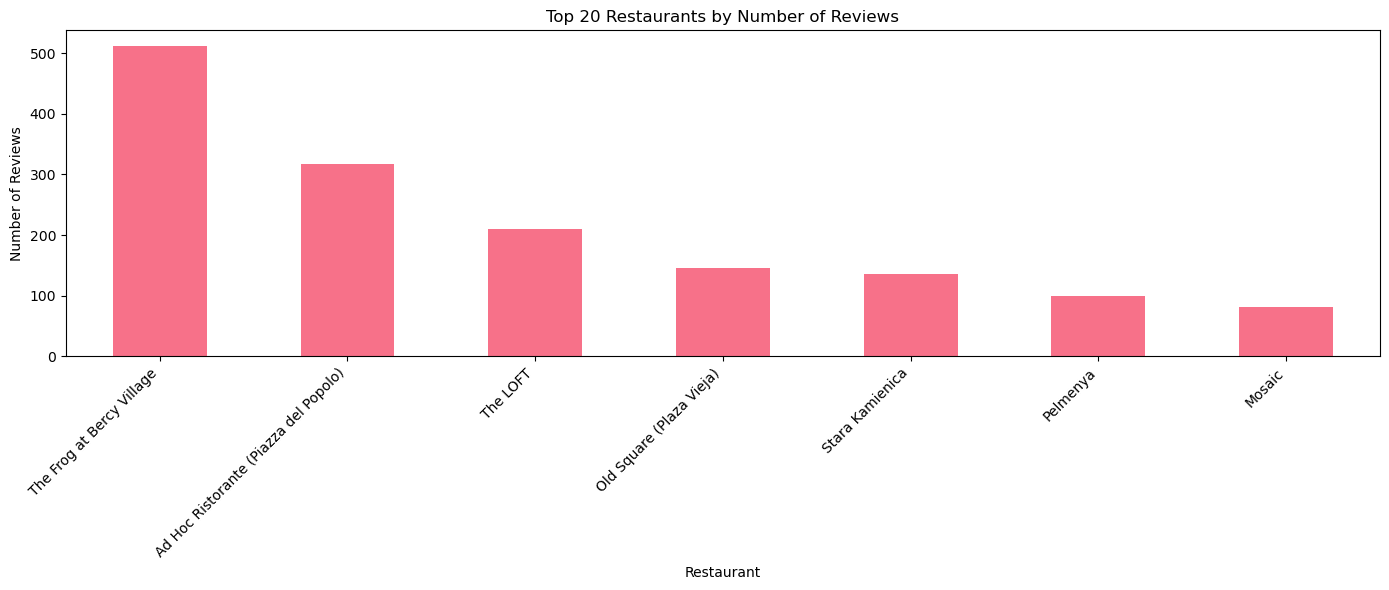



=== SENTIMENT BALANCE ANALYSIS ===

Analyzing Sentiment:
Sentiment distribution:
Sentiment
Negative     265
Positive    1237
Name: count, dtype: int64

Sentiment percentages:
Negative: 17.64%
Positive: 82.36%

Chi-square statistic for balance: 629.017
⚠ Dataset appears to be imbalanced in terms of sentiment


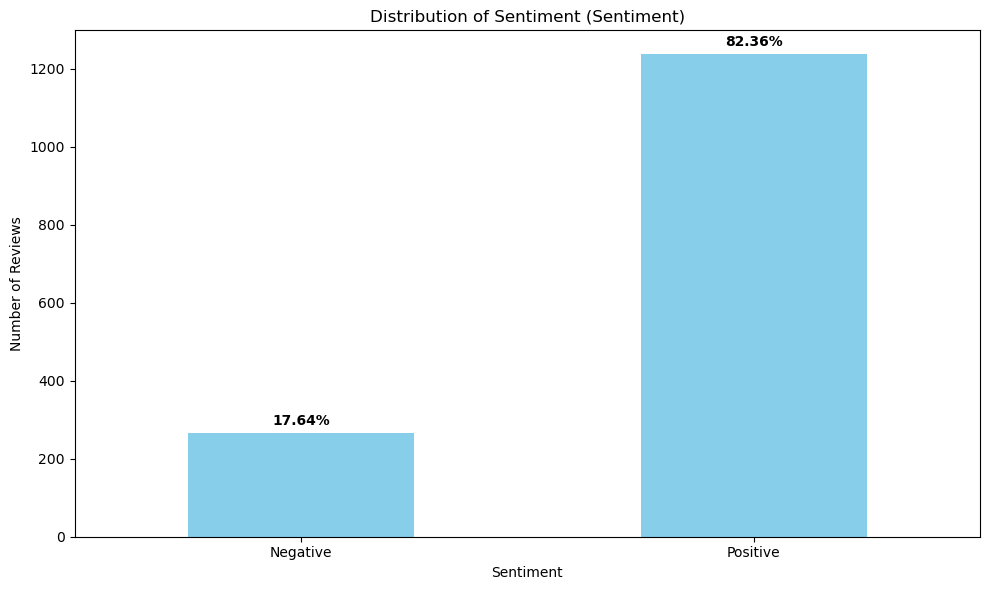



=== DATA VALIDATION ===
Checking data validity...
Number of duplicate rows: 49
Empty reviews in Review Title: 0
Empty reviews in Review Date: 0
Empty reviews in Review: 0
Empty reviews in Review Date_parsed: 0

=== PROBLEM 1 SUMMARY ===
✓ Total observations: 1502
✓ Most represented country: France (512 reviews)
✓ Time range: 2010-09-01 to 2024-07-01
✓ Restaurant balance: imbalanced (CV: 0.715)
✓ Sentiment balance: imbalanced (Chi-square: 629.017)


In [9]:

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Read the dataset
# Correct file path with spaces in filename
df = pd.read_csv('data\\European Restaurant Reviews.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\n" + "="*50)

# Display basic info about the dataset
print("\n=== DATASET INFO ===")
print(df.info())
print("\n" + "="*50)

# Display first few rows to understand structure
print("\n=== FIRST 5 ROWS ===")
print(df.head())
print("\n" + "="*50)

# Check for missing values
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])
print("\n" + "="*50)

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(df.describe(include='all'))
print("\n" + "="*50)

# Check column names to understand what we're working with
print("\n=== COLUMN NAMES ===")
print("Columns in dataset:", list(df.columns))
print("\n" + "="*50)

# Analyze country representation
print("\n=== COUNTRY ANALYSIS ===")
if 'country' in df.columns or 'Country' in df.columns:
    country_col = 'country' if 'country' in df.columns else 'Country'
    country_counts = df[country_col].value_counts()
    print("Country distribution:")
    print(country_counts)
    print(f"\nMost represented country: {country_counts.index[0]} ({country_counts.iloc[0]} reviews)")
    
    # Visualize country distribution
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar')
    plt.title('Distribution of Reviews by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'country' or 'Country' column found. Available columns:", list(df.columns))

print("\n" + "="*50)

# Analyze time range
print("\n=== TIME RANGE ANALYSIS ===")
# More specific search for date columns, excluding sentiment
date_columns = [col for col in df.columns if ('date' in col.lower() or 'time' in col.lower()) 
                and 'sentiment' not in col.lower()]

if date_columns:
    for date_col in date_columns:
        print(f"\nAnalyzing {date_col}:")
        try:
            # Check original data before conversion
            print(f"Sample values: {df[date_col].head().tolist()}")
            print(f"Unique values count: {df[date_col].nunique()}")
            
            # Handle the specific format "May 2024 •" etc.
            def parse_review_date(date_str):
                if pd.isna(date_str):
                    return pd.NaT
                # Remove the bullet point and extra spaces
                date_str = str(date_str).replace('•', '').strip()
                try:
                    # Parse format like "May 2024", "January 2023", etc.
                    return pd.to_datetime(date_str, format='%B %Y')
                except:
                    try:
                        # Fallback to general parsing
                        return pd.to_datetime(date_str, errors='coerce')
                    except:
                        return pd.NaT
            
            # Apply custom parsing
            df[f'{date_col}_parsed'] = df[date_col].apply(parse_review_date)
            
            # Check for valid dates
            valid_dates = df[f'{date_col}_parsed'].dropna()
            if len(valid_dates) > 0:
                print(f"Date range: {valid_dates.min()} to {valid_dates.max()}")
                time_span = (valid_dates.max() - valid_dates.min()).days
                print(f"Time span: {time_span} days ({time_span/365.25:.1f} years)")
                
                # Show distribution by year and month
                years = valid_dates.dt.year
                months = valid_dates.dt.to_period('M')
                
                print(f"Years covered: {sorted(years.unique())}")
                print(f"Number of different months: {months.nunique()}")
                
                # Plot year distribution
                if years.nunique() > 1:
                    plt.figure(figsize=(12, 6))
                    years.value_counts().sort_index().plot(kind='bar')
                    plt.title(f'Distribution of Reviews by Year ({date_col})')
                    plt.xlabel('Year')
                    plt.ylabel('Number of Reviews')
                    plt.xticks(rotation=0)
                    plt.tight_layout()
                    plt.show()
                
                # Plot monthly distribution if we have enough variation
                if months.nunique() > 3:
                    plt.figure(figsize=(14, 6))
                    month_counts = months.value_counts().sort_index()
                    month_counts.plot(kind='bar')
                    plt.title(f'Distribution of Reviews by Month ({date_col})')
                    plt.xlabel('Month')
                    plt.ylabel('Number of Reviews')
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"Limited monthly variation - showing month counts:")
                    print(months.value_counts().sort_index())
                    
            else:
                print("No valid dates found after parsing")
                print("Sample problematic values:", df[date_col].head(10).tolist())
                
        except Exception as e:
            print(f"Error processing {date_col}: {e}")
            import traceback
            print("Full error:", traceback.format_exc())
else:
    print("No date columns found. Available columns:", list(df.columns))
    # Show what columns exist for debugging
    print("All columns:", [col for col in df.columns])

print("\n" + "="*50)

# Analyze restaurant balance
print("\n=== RESTAURANT BALANCE ANALYSIS ===")
restaurant_columns = [col for col in df.columns if 'restaurant' in col.lower() or 'name' in col.lower()]
if restaurant_columns:
    for rest_col in restaurant_columns:
        print(f"\nAnalyzing {rest_col}:")
        restaurant_counts = df[rest_col].value_counts()
        print(f"Number of unique restaurants: {len(restaurant_counts)}")
        print(f"Average reviews per restaurant: {restaurant_counts.mean():.2f}")
        print(f"Median reviews per restaurant: {restaurant_counts.median():.2f}")
        print(f"Min reviews per restaurant: {restaurant_counts.min()}")
        print(f"Max reviews per restaurant: {restaurant_counts.max()}")
        
        print("\nTop 10 restaurants by number of reviews:")
        print(restaurant_counts.head(10))
        
        # Check balance
        std_dev = restaurant_counts.std()
        mean_reviews = restaurant_counts.mean()
        cv = std_dev / mean_reviews  # Coefficient of variation
        print(f"\nCoefficient of variation: {cv:.3f}")
        if cv < 0.5:
            print("✓ Dataset is relatively balanced across restaurants")
        else:
            print("⚠ Dataset is imbalanced across restaurants")
        
        # Visualize restaurant distribution
        plt.figure(figsize=(14, 6))
        restaurant_counts.head(20).plot(kind='bar')
        plt.title('Top 20 Restaurants by Number of Reviews')
        plt.xlabel('Restaurant')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        break  # Only analyze first restaurant column found
else:
    print("No restaurant name columns found. Available columns:", list(df.columns))

print("\n" + "="*50)

# Analyze sentiment balance - this is the most important part
print("\n=== SENTIMENT BALANCE ANALYSIS ===")
sentiment_columns = [col for col in df.columns if 'sentiment' in col.lower() or 'rating' in col.lower() or 'score' in col.lower()]

if sentiment_columns:
    for sent_col in sentiment_columns:
        print(f"\nAnalyzing {sent_col}:")
        sentiment_counts = df[sent_col].value_counts().sort_index()
        print("Sentiment distribution:")
        print(sentiment_counts)
        
        # Calculate balance metrics
        total_reviews = len(df)
        sentiment_percentages = (sentiment_counts / total_reviews * 100).round(2)
        print(f"\nSentiment percentages:")
        for sentiment, percentage in sentiment_percentages.items():
            print(f"{sentiment}: {percentage}%")
        
        # Check if balanced (roughly equal distribution)
        expected_per_class = total_reviews / len(sentiment_counts)
        chi_square = sum((count - expected_per_class)**2 / expected_per_class for count in sentiment_counts)
        print(f"\nChi-square statistic for balance: {chi_square:.3f}")
        
        if chi_square < 10:  # Rough threshold
            print("✓ Dataset appears to be balanced in terms of sentiment")
        else:
            print("⚠ Dataset appears to be imbalanced in terms of sentiment")
        
        # Visualize sentiment distribution
        plt.figure(figsize=(10, 6))
        sentiment_counts.plot(kind='bar', color=['red', 'orange', 'green'] if len(sentiment_counts) == 3 else 'skyblue')
        plt.title(f'Distribution of Sentiment ({sent_col})')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=0)
        
        # Add percentage labels on bars
        for i, (sentiment, count) in enumerate(sentiment_counts.items()):
            plt.text(i, count + total_reviews*0.01, f'{sentiment_percentages[sentiment]}%', 
                    ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        break  # Only analyze first sentiment column found
else:
    print("No sentiment/rating columns found. Available columns:", list(df.columns))

print("\n" + "="*50)

# Data validation checks
print("\n=== DATA VALIDATION ===")
print("Checking data validity...")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for empty text reviews (if text column exists)
text_columns = [col for col in df.columns if 'review' in col.lower() or 'text' in col.lower() or 'comment' in col.lower()]
if text_columns:
    for text_col in text_columns:
        empty_reviews = df[text_col].isna().sum() + (df[text_col] == '').sum()
        print(f"Empty reviews in {text_col}: {empty_reviews}")

# Final summary for Problem 1
print("\n" + "="*70)
print("=== PROBLEM 1 SUMMARY ===")
print(f"✓ Total observations: {df.shape[0]}")
if 'country_counts' in locals():
    print(f"✓ Most represented country: {country_counts.index[0]} ({country_counts.iloc[0]} reviews)")
if 'date_col' in locals() and df[f'{date_col}_parsed'].notna().any():
    print(f"✓ Time range: {df[f'{date_col}_parsed'].min().strftime('%Y-%m-%d')} to {df[f'{date_col}_parsed'].max().strftime('%Y-%m-%d')}")
if 'restaurant_counts' in locals():
    balance_status = "balanced" if cv < 0.5 else "imbalanced"
    print(f"✓ Restaurant balance: {balance_status} (CV: {cv:.3f})")
if 'sentiment_counts' in locals():
    sentiment_balance = "balanced" if chi_square < 10 else "imbalanced"
    print(f"✓ Sentiment balance: {sentiment_balance} (Chi-square: {chi_square:.3f})")
print("="*70)

### Problem 2. Getting acquainted with reviews (1 point)
Are positive comments typically shorter or longer? Try to define a good, robust metric for "length" of a text; it's not necessary just the character count. Can you explain your findings?

### Problem 3. Preprocess the review content (2 points)
You'll likely need to do this while working on the problems below, but try to synthesize (and document!) your preprocessing here. Your tasks will revolve around words and their connection to sentiment. While preprocessing, keep in mind the domain (restaurant reviews) and the task (sentiment analysis).

### Problem 4. Top words (1 point)
Use a simple word tokenization and count the top 10 words in positive reviews; then the top 10 words in negative reviews*. Once again, try to define what "top" words means. Describe and document your process. Explain your results.

\* Okay, you may want to see top N words (with $N \ge 10$).

### Problem 5. Review titles (2 point)
How do the top words you found in the last problem correlate to the review titles? Do the top 10 words (for each sentiment) appear in the titles at all? Do reviews which contain one or more of the top words have the same words in their titles?

Does the title of a comment present a good summary of its content? That is, are the titles descriptive, or are they simply meant to catch the attention of the reader?

### Problem 6. Bag of words (1 point)
Based on your findings so far, come up with a good set of settings (hyperparameters) for a bag-of-words model for review titles and contents. It's easiest to treat them separately (so, create two models); but you may also think about a unified representation. I find the simplest way of concatenating the title and content too simplistic to be useful, as it doesn't allow you to treat the title differently (e.g., by giving it more weight).

The documentation for `CountVectorizer` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Familiarize yourself with all settings; try out different combinations and come up with a final model; or rather - two models :).

### Problem 7. Deep sentiment analysis models (1 point)
Find a suitable model for sentiment analysis in English. Without modifying, training, or fine-tuning the model, make it predict all contents (or better, combinations of titles and contents, if you can). Meaure the accuracy of the model compared to the `sentiment` column in the dataset.

### Problem 8. Deep features (embeddings) (1 point)
Use the same model to perform feature extraction on the review contents (or contents + titles) instead of direct predictions. You should already be familiar how to do that from your work on images.

Use the cosine similarity between texts to try to cluster them. Are there "similar" reviews (you'll need to find a way to measure similarity) across different restaurants? Are customers generally in agreement for the same restaurant?

### \* Problem 9. Explore and model at will
In this lab, we focused on preprocessing and feature extraction and we didn't really have a chance to train (or compare) models. The dataset is maybe too small to be conclusive, but feel free to play around with ready-made models, and train your own.